<h1> <big> ------------------Walmart Weekly Sales Forecasting------------------

<h1> 1. Importing necessary Libraries

In [5]:
#For data import, basic operations and visualisations
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#import pandas_profiling as pp
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [7]:
# Quick Function to check for missing Values
def  Missing_Inspection(x):
    return pd.Series([x.count(),x.isnull().sum()],index = ['N',"NMISS"])

#UDF to Create Numerical Data Audit Report
def  num_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index = ['N',"NMISS","SUM",'MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])

# UDF to create categorical data audit report
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()], index=['N','NMISS','ColumnsName'])

<h1> 2. Data Propressing

In [11]:
train = pd.read_csv('../data/external/train.csv')
feature = pd.read_csv('../data/external/features.csv')
test = pd.read_csv('../data/external/test.csv')
stores = pd.read_csv('../data/external/stores.csv')

In [12]:
test.shape

(115064, 4)

In [15]:
train.shape, feature.shape, stores.shape

((421570, 5), (8190, 12), (45, 3))

In [17]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [19]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


<h1> 3. Data Preparation </h1>

*** Creating a complete dataframe to work with *** 
- Merging train, store and features 
- Merging test, store and features 

*** (inner merge which is default is selected) *** 

In [22]:
# Merging Train dataset
train_1=pd.merge(train, stores)
train=pd.merge(train_1, feature, on=["Store","Date",'IsHoliday'])
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


In [24]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [26]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Weekly_Sales'], axis=1), train['Weekly_Sales'], test_size=0.1, random_state=1)

In [29]:
# Merging Test dataset
# test_1=pd.merge(test, stores)
# test=pd.merge(test_1, feature, on=["Store","Date",'IsHoliday'])
# test.head(2)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379413 entries, 18120 to 128037
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         379413 non-null  int64  
 1   Dept          379413 non-null  int64  
 2   Date          379413 non-null  object 
 3   IsHoliday     379413 non-null  bool   
 4   Type          379413 non-null  object 
 5   Size          379413 non-null  int64  
 6   Temperature   379413 non-null  float64
 7   Fuel_Price    379413 non-null  float64
 8   MarkDown1     135641 non-null  float64
 9   MarkDown2     100163 non-null  float64
 10  MarkDown3     123414 non-null  float64
 11  MarkDown4     121527 non-null  float64
 12  MarkDown5     136322 non-null  float64
 13  CPI           379413 non-null  float64
 14  Unemployment  379413 non-null  float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 43.8+ MB


In [33]:
X_train

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
18120,2,74,2012-06-15,False,A,202307,80.56,3.393,8573.41,195.00,0.19,4455.38,5288.61,221.400990,6.891
248477,26,12,2010-02-26,False,A,152513,27.32,2.753,NaN,NaN,NaN,NaN,NaN,131.686000,8.488
76886,8,81,2012-07-06,False,A,155078,81.24,3.227,10526.01,157.93,182.17,3068.98,4059.99,225.440704,5.401
80121,9,11,2010-10-01,False,B,125833,69.08,2.603,NaN,NaN,NaN,NaN,NaN,215.214134,6.560
159138,17,12,2012-01-13,False,B,93188,20.28,3.056,1552.86,3911.73,0.52,542.24,1709.97,130.244000,6.403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,8,34,2010-10-29,False,A,155078,57.93,2.716,NaN,NaN,NaN,NaN,NaN,215.273900,6.433
371403,40,4,2010-06-18,False,A,155083,60.97,2.805,NaN,NaN,NaN,NaN,NaN,132.473333,5.435
312201,32,82,2011-02-04,False,A,203007,15.47,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818
267336,28,3,2011-06-10,False,A,206302,78.72,3.981,NaN,NaN,NaN,NaN,NaN,129.035710,13.736


#### Spliting numeric and Categorical data from train

In [36]:
###Train Numerical Data
train_num=X_train.select_dtypes(include=['float64', 'float32','int32','int64'])

###Train Categorical Data
train_cat = X_train.select_dtypes(include=['object', 'O'])

In [38]:
print('train Num Var: ' , train_num.columns.to_list())
print('\n','train Cat Var: ', train_cat.columns.to_list())

train Num Var:  ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

 train Cat Var:  ['Date', 'Type']


In [40]:
writer=pd.ExcelWriter('Walmart_Sales.xlsx')

In [41]:
# Numerical Summary for Train Data Set
num_summary = train_num.apply(num_var_summary).T
# num_summary.to_excel(writer,'num_var_summ_train',index=True)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,379413.0,0.0,8.424103e+06,22.202990,22.000000,12.787883,1.635299e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,379413.0,0.0,1.679273e+07,44.259757,37.000000,30.494477,9.299131e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,379413.0,0.0,5.188088e+10,136739.860566,140167.000000,60982.978920,3.718924e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,379413.0,0.0,2.279458e+07,60.078555,62.080000,18.454676,3.405751e+02,-2.060,18.300000,27.280000,33.940000,46.670000,62.080000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,379413.0,0.0,1.275265e+06,3.361154,3.452000,0.458504,2.102256e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.452000,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,135641.0,243772.0,9.834326e+08,7250.260289,5343.290000,8310.000885,6.905611e+07,0.270,17.760000,148.320000,375.610000,2240.270000,5343.290000,9210.900000,15282.470000,21823.530000,41524.030000,88646.760000
MarkDown2,100163.0,279250.0,3.345933e+08,3340.488340,192.000000,9476.867599,8.981102e+07,-265.760,-0.990000,1.950000,7.000000,41.640000,192.000000,1943.200000,8625.860000,16497.470000,50366.600000,104519.540000
MarkDown3,123414.0,255999.0,1.773926e+08,1437.378499,24.600000,9624.429437,9.262964e+07,-29.100,0.060000,0.650000,1.650000,5.100000,24.600000,103.830000,399.770000,1059.900000,63143.290000,141630.610000
MarkDown4,121527.0,257886.0,4.118168e+08,3388.685924,1479.910000,6308.487805,3.979702e+07,0.220,3.970000,28.760000,108.710000,504.220000,1479.910000,3595.040000,7931.420000,12823.700000,37091.670000,67474.850000
MarkDown5,136322.0,243091.0,6.310161e+08,4628.864938,3361.360000,5965.532231,3.558757e+07,135.160,351.970000,715.520000,1064.560000,1877.810000,3361.360000,5563.800000,8346.740000,11269.240000,27754.230000,108519.280000


In [42]:
# train Categorical Summary
cat_summary_train = train_cat.apply(cat_summary).T
# cat_summary_train.to_excel(writer,'cat_summ_train', index=True)
cat_summary_train

,N,NMISS,ColumnsName
Date,379413,0,Date 2011-11-25 2719 2011-12-30 2717 201...
Type,379413,0,Type A 194036 B 147043 C 38334 Name:...


<h3> Splitting Categorical and Numerical Data for test dataset

In [45]:
###Test Numerical Data
test_num=X_test.select_dtypes(include=['float64', 'float32','int32','int64'])

###Test Categorical Data
test_cat = X_test.select_dtypes(include=['object', 'O'])

In [46]:
num_summary_test = test_num.apply(num_var_summary).T
# num_summary_test.to_excel(writer,'num_var_summ_test',index=True)
num_summary_test

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,42157.0,0.0,9.349810e+05,22.178547,22.000000,12.762134,1.628721e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,42157.0,0.0,1.866095e+06,44.265365,37.000000,30.470599,9.284574e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.000000,74.000000,91.000000,95.000000,98.000000,99.000000
Size,42157.0,0.0,5.759507e+09,136620.412292,140167.000000,60959.636506,3.716077e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,42157.0,0.0,2.537581e+06,60.193595,62.210000,18.387012,3.380822e+02,-2.060,18.140000,27.410000,34.240000,46.850000,62.210000,74.370000,83.510000,87.260000,92.754000,100.140000
Fuel_Price,42157.0,0.0,1.416425e+05,3.359882,3.452000,0.458616,2.103286e-01,2.472,2.565000,2.653000,2.720000,2.932000,3.452000,3.737000,3.915000,4.029000,4.202000,4.468000
MarkDown1,15040.0,27117.0,1.084653e+08,7211.787614,5425.300000,8120.081839,6.593573e+07,0.270,19.970000,150.460000,370.160000,2229.320000,5425.300000,9249.620000,15255.040000,21442.730000,40493.450000,88646.760000
MarkDown2,11085.0,31072.0,3.637743e+07,3281.680760,191.400000,9461.962100,8.952873e+07,-265.760,-0.990000,1.910000,6.920000,40.660000,191.400000,1839.820000,8292.730000,16497.470000,50076.680000,104519.540000
MarkDown3,13677.0,28480.0,1.993909e+07,1457.855297,24.700000,9611.209500,9.237535e+07,-29.100,0.060000,0.680000,1.700000,5.000000,24.700000,106.080000,438.284000,1077.820000,62095.850000,141630.610000
MarkDown4,13440.0,28717.0,4.479924e+07,3333.276470,1505.630000,6144.859784,3.775930e+07,0.220,3.970000,28.040000,108.676000,499.910000,1505.630000,3557.930000,7768.330000,12205.870000,35364.080000,67474.850000
MarkDown5,15110.0,27047.0,6.995883e+07,4629.968773,3312.990000,5939.169734,3.527374e+07,135.160,369.740000,722.920000,1110.120000,1890.590000,3312.990000,5533.120000,8323.510000,11292.340000,28238.930000,108519.280000


In [47]:
#report_train=pp.ProfileReport(train)
#report_train.to_file('Report_train.html')

In [48]:
#report_test=pp.ProfileReport(test)
#report_test.to_file('Report_test.html')

<h3> Key Observations: </h3>

- MarkDown 5 is highly skewed 

- MarkDown 1 and 4 are highly correlated

## Correlation

In [51]:
train1 = X_train.select_dtypes(include=['float64', 'float32','int32','int64'])
train_corr = pd.DataFrame(train1.corr())
# train_corr.to_excel(writer,'train_data_corr',index = True)
train_corr

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.025055,-0.183379,-0.050141,0.065134,-0.120451,-0.034414,-0.031453,-0.010788,-0.026982,-0.211336,0.208615
Dept,0.025055,1.000000,-0.003424,0.004350,0.003178,-0.002582,0.001150,0.001619,0.004125,-0.000831,-0.006837,0.008261
Size,-0.183379,-0.003424,1.000000,-0.058721,0.003472,0.345843,0.109029,0.048334,0.167635,0.304865,-0.003596,-0.068348
Temperature,-0.050141,0.004350,-0.058721,1.000000,0.144118,-0.039739,-0.324744,-0.096301,-0.063710,-0.017343,0.182289,0.097240
Fuel_Price,0.065134,0.003178,0.003472,0.144118,1.000000,0.061257,-0.221877,-0.101773,-0.044621,-0.127489,-0.164811,-0.034095
MarkDown1,-0.120451,-0.002582,0.345843,-0.039739,0.061257,1.000000,0.023819,-0.107911,0.820211,0.160749,-0.054353,0.050119
MarkDown2,-0.034414,0.001150,0.109029,-0.324744,-0.221877,0.023819,1.000000,-0.050210,-0.008245,-0.007172,-0.040586,0.019550
MarkDown3,-0.031453,0.001619,0.048334,-0.096301,-0.101773,-0.107911,-0.050210,1.000000,-0.071010,-0.027100,-0.022174,0.012989
MarkDown4,-0.010788,0.004125,0.167635,-0.063710,-0.044621,0.820211,-0.008245,-0.071010,1.000000,0.107879,-0.048656,0.025339
MarkDown5,-0.026982,-0.000831,0.304865,-0.017343,-0.127489,0.160749,-0.007172,-0.027100,0.107879,1.000000,0.060867,-0.004353


<Axes: >

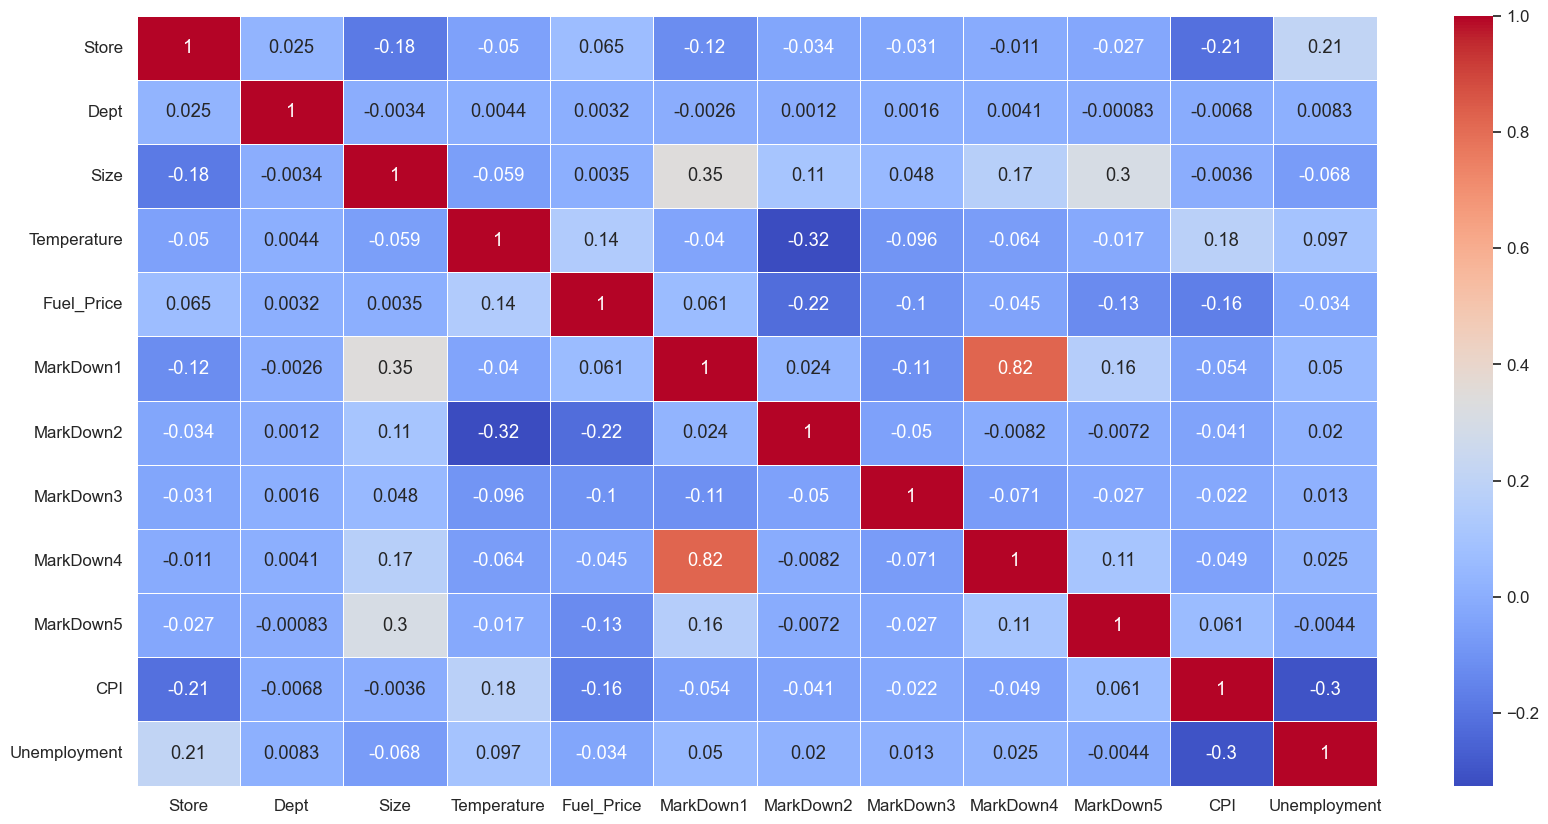

In [52]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(train1.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

In [53]:

test_corr = pd.DataFrame(X_test.select_dtypes(include=['float64', 'float32','int32','int64']).corr())
# test_corr.to_excel(writer,'test_data_corr',index = True)
test_corr

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.014520,-0.178395,-0.049689,0.066696,-0.111614,-0.042059,-0.032488,-0.002038,-0.023471,-0.208842,0.207982
Dept,0.014520,1.000000,0.001160,0.005217,0.007123,-0.000980,-0.007450,0.003264,0.005509,0.008638,-0.013239,0.003997
Size,-0.178395,0.001160,1.000000,-0.054615,0.002356,0.344197,0.107036,0.054140,0.173548,0.301946,-0.000767,-0.067247
Temperature,-0.049689,0.005217,-0.054615,1.000000,0.141536,-0.048453,-0.316503,-0.102130,-0.066119,-0.019368,0.180482,0.092098
Fuel_Price,0.066696,0.007123,0.002356,0.141536,1.000000,0.062476,-0.211911,-0.105003,-0.048386,-0.133332,-0.158800,-0.031661
MarkDown1,-0.111614,-0.000980,0.344197,-0.048453,0.062476,1.000000,0.030636,-0.110024,0.809990,0.155725,-0.066639,0.051869
MarkDown2,-0.042059,-0.007450,0.107036,-0.316503,-0.211911,0.030636,1.000000,-0.049189,-0.003388,-0.009894,-0.029940,0.033577
MarkDown3,-0.032488,0.003264,0.054140,-0.102130,-0.105003,-0.110024,-0.049189,1.000000,-0.071902,-0.020852,-0.036413,0.011253
MarkDown4,-0.002038,0.005509,0.173548,-0.066119,-0.048386,0.809990,-0.003388,-0.071902,1.000000,0.107029,-0.058609,0.021587
MarkDown5,-0.023471,0.008638,0.301946,-0.019368,-0.133332,0.155725,-0.009894,-0.020852,0.107029,1.000000,0.058480,0.000780


<Axes: >

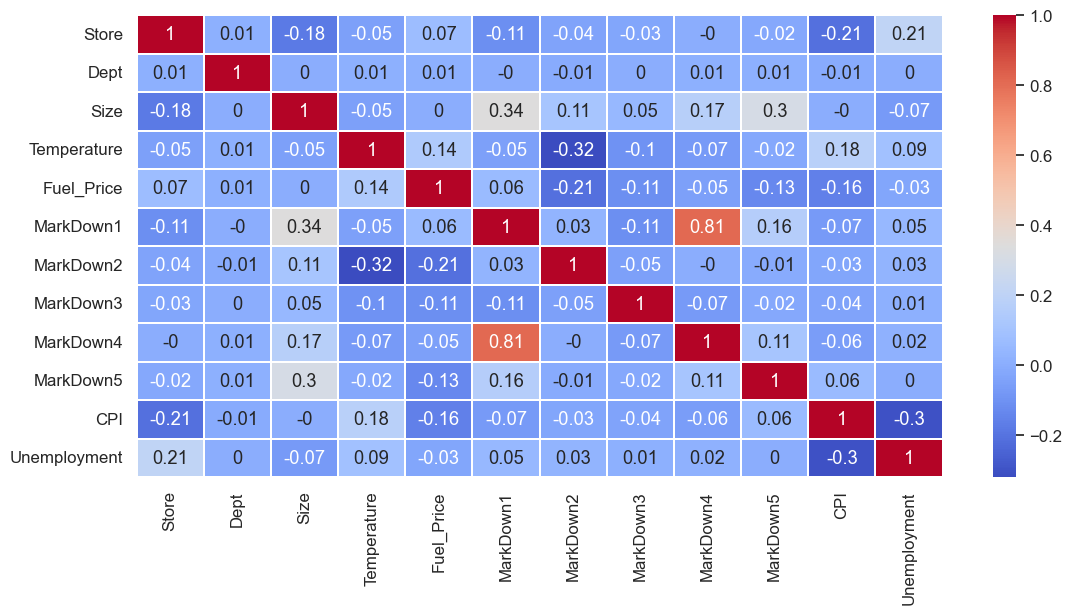

In [54]:
sns.set(rc={'figure.figsize':(13,6)}, font_scale=1.1)
sns.heatmap((X_test.select_dtypes(include=['float64', 'float32','int32','int64']).corr()).round(2),linewidths=0.25,annot=True,cmap='coolwarm')

<h1> Data Exploratory Analysis

<Axes: xlabel='Store'>

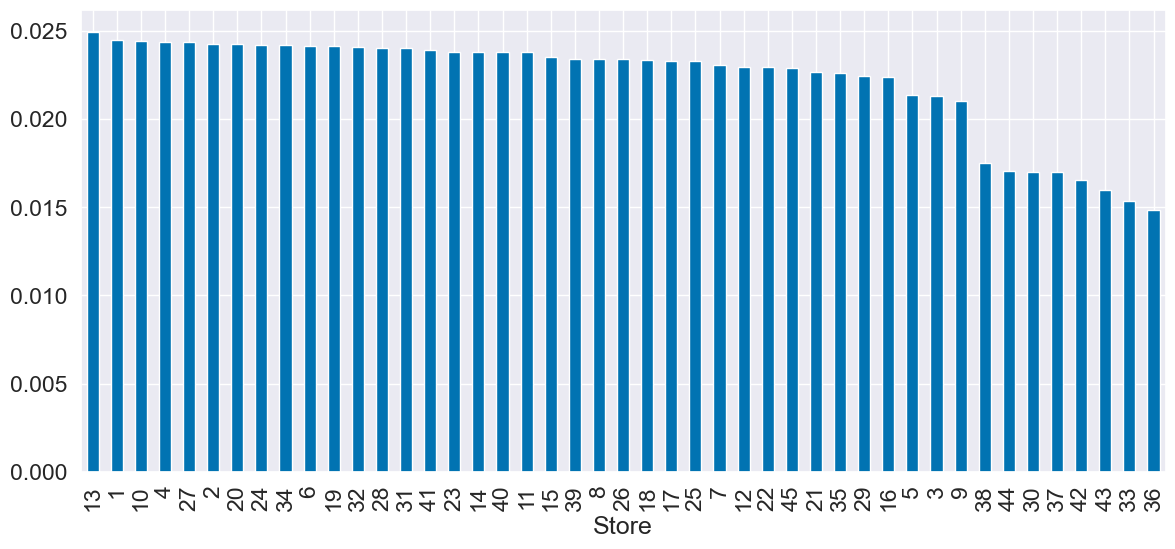

In [57]:
sns.set(rc={'figure.figsize':(14,6)}, palette="colorblind", font_scale=1.5)
X_train['Store'].value_counts(normalize=True).plot(kind = 'bar')

- <big><big>Store 13 are more, store 36 are less

<h2> Distribution of Weekly Sales-y variable

C:\Users\Mohit Bagga\AppData\Local\Temp\ipykernel_12588\1359327905.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

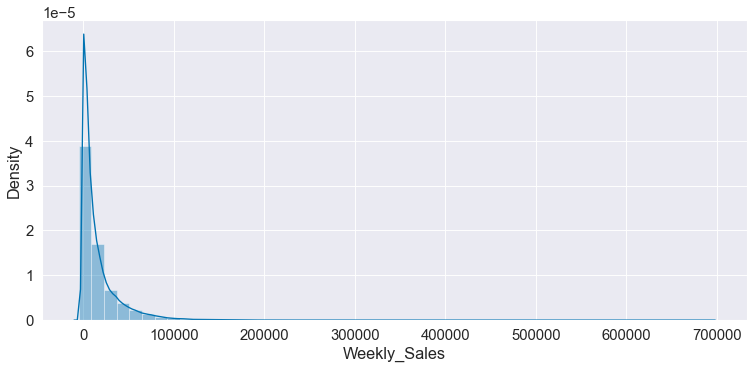

In [64]:
plt.figure(dpi=65)
sns.distplot(y_train)

- <big><big>  Highly Skewed 
- Gives the idea, most of the outliers are after 100000, this simplifies outlier capping 

<h2> Sales based on Store

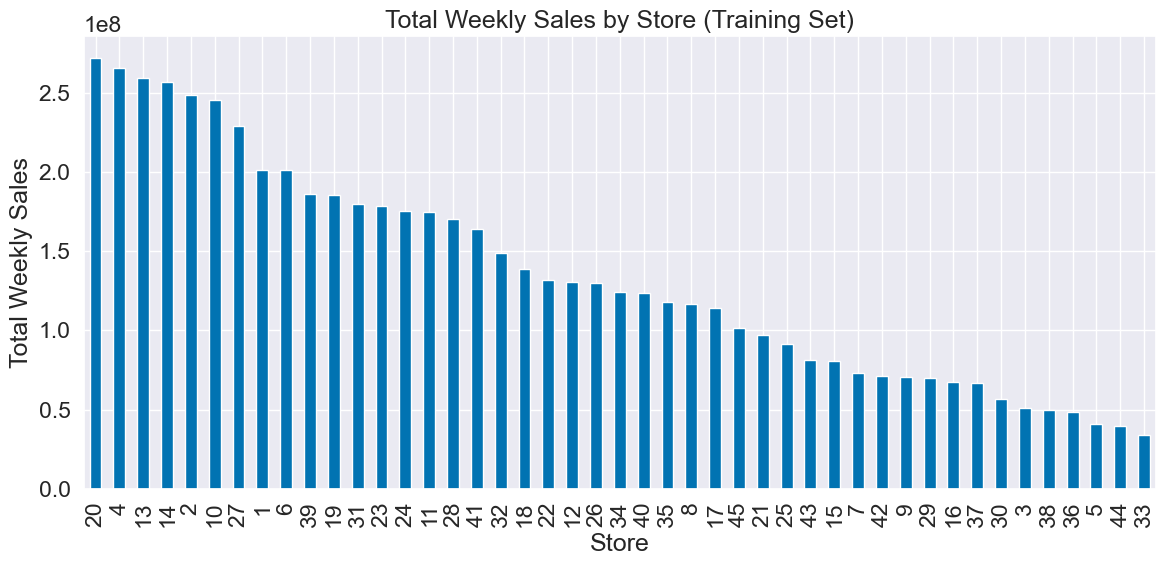

In [69]:
# train.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')

df = pd.DataFrame({
    'Store': X_train['Store'],
    'Weekly_Sales': y_train
})

df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Store (Training Set)')
plt.tight_layout()
plt.show()

#train.plot(kind='barh',x='Weekly_Sales', y='Store', alpha=0.5)

<h2> Sales based on Type

C:\Users\Mohit Bagga\AppData\Local\Temp\ipykernel_12588\1809792686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_train,x=X_train["Type"],palette='colorblind')


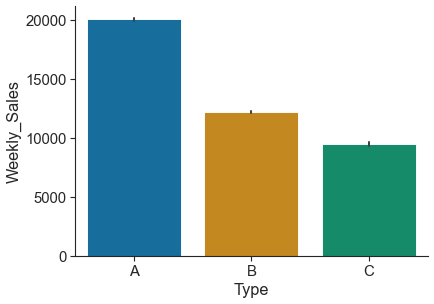

In [71]:
plt.figure(figsize=(7,5),dpi=65)
sns.set_style('ticks')
sns.barplot(y=y_train,x=X_train["Type"],palette='colorblind')
sns.despine()

- <big><big>  'type C' stores have less sales and 'type A' stores have more sales in general.

<h2> Department wise sales visualisation

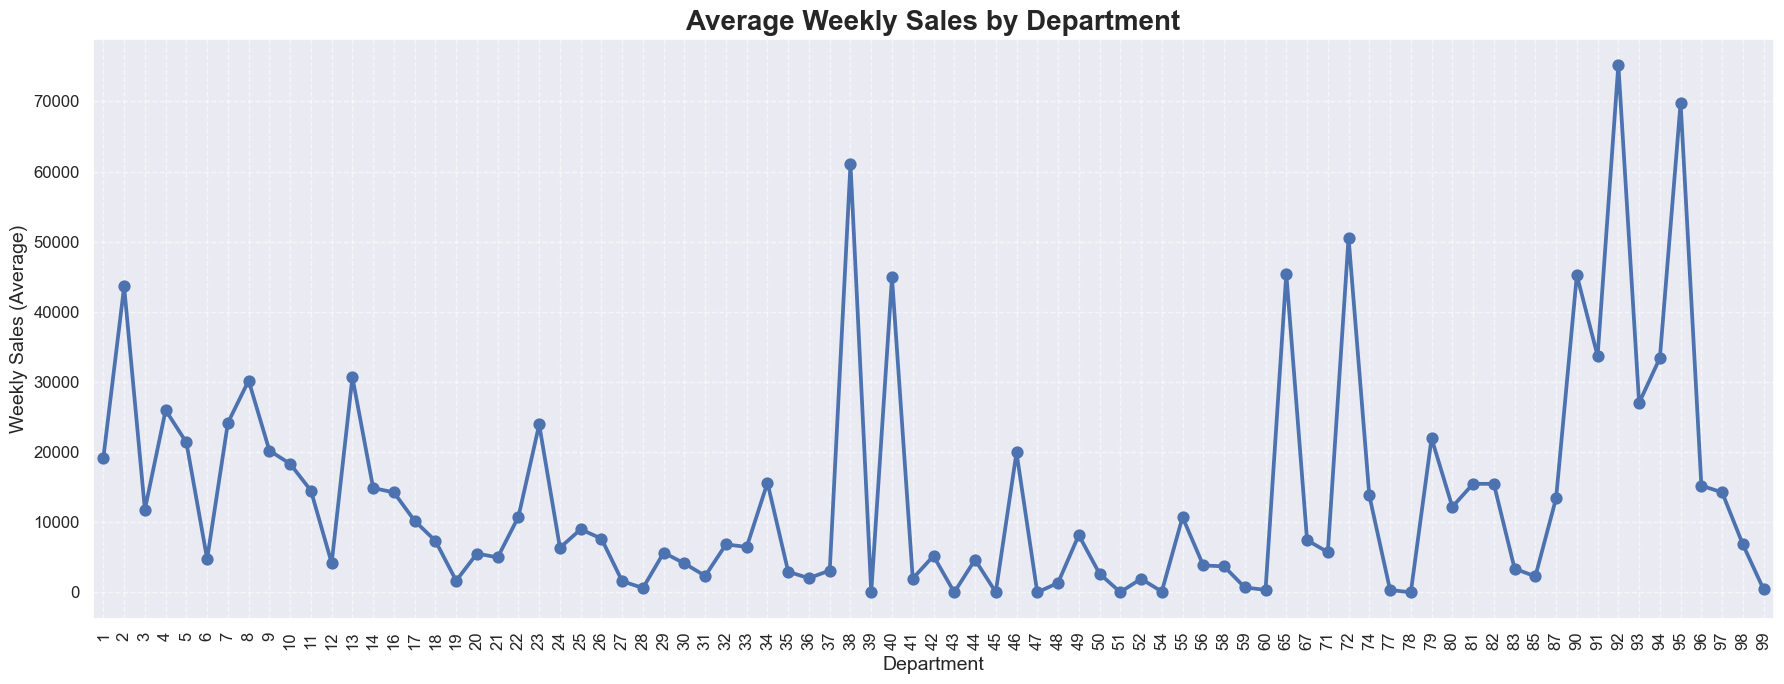

In [81]:
sns.set_style('darkgrid')
sns.set_context("talk")  # Larger font sizes for better readability
sns.set_palette("viridis")  # Better color palette
sns.set(rc={'figure.figsize': (18, 7)})

# Plot
sns.pointplot(x='Dept', y='Weekly_Sales', data=train, errorbar=None)
plt.title('Average Weekly Sales by Department', fontsize=20, fontweight='bold')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Weekly Sales (Average)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- <big><big> Dept. with highest weekly sales is 92

<h2> Missing Value Inspection

In [85]:
#df=pd.DataFrame(train.isnull().sum(), columns={"N_miss":"0"})
#print('Missing Values Train:', "\n",df[df["N_miss"]>0])
#print('.><.'*7)
#df2=pd.DataFrame(test.isnull().sum(), columns={"N_miss":"0"})
#print('Missing Values Test:', "\n",df2[df2["N_miss"]>0])
X_train.apply(Missing_Inspection).T

,N,NMISS
Store,379413,0
Dept,379413,0
Date,379413,0
IsHoliday,379413,0
Type,379413,0
Size,379413,0
Temperature,379413,0
Fuel_Price,379413,0
MarkDown1,135641,243772
MarkDown2,100163,279250


In [87]:
X_test.apply(Missing_Inspection).T

,N,NMISS
Store,42157,0
Dept,42157,0
Date,42157,0
IsHoliday,42157,0
Type,42157,0
Size,42157,0
Temperature,42157,0
Fuel_Price,42157,0
MarkDown1,15040,27117
MarkDown2,11085,31072


## Negative Value Inspection

In [90]:
print(train_num.apply(num_var_summary).T['MIN']<0)
print('\n','.><.'*7)
print(test_num.apply(num_var_summary).T['MIN']<0)

Store           False
Dept            False
Size            False
Temperature      True
Fuel_Price      False
MarkDown1       False
MarkDown2        True
MarkDown3        True
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Name: MIN, dtype: bool

 .><..><..><..><..><..><..><.
Store           False
Dept            False
Size            False
Temperature      True
Fuel_Price      False
MarkDown1       False
MarkDown2        True
MarkDown3        True
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Name: MIN, dtype: bool


#### Since sales and promotional offers (Markdown 2 and 3) cannot be negative, we will replace negative values with 0
#### Assuming there is no offer if not recorded, we can safely replace np.NAN with 0 in case of Markdowns
#### In case of test filling CPI and Unemploymrnt by mean values

In [93]:
#1 negative Value Cleaning for both train and test dataset
y_train[y_train < 0] = 0
y_test[y_test < 0] = 0
X_train.loc[X_train['MarkDown2'] < 0 ,'MarkDown2'] = 0
X_train.loc[X_train['MarkDown3'] < 0, 'MarkDown3'] = 0
X_test.loc[X_test['MarkDown1'] < 0 ,'MarkDown1']= 0
X_test.loc[X_test['MarkDown2'] < 0, 'MarkDown2'] = 0
X_test.loc[X_test['MarkDown3'] < 0 ,'MarkDown3']= 0
X_test.loc[X_test['MarkDown5'] < 0 ,'MarkDown5']= 0

In [96]:
#2 Missing Value treatment for "test" Other than Markdowns
X_test['CPI'] = X_test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
X_test['Unemployment'] = X_test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [98]:
#3 Now we can Fill NAN Markdowns with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [100]:
X_train.apply(Missing_Inspection).T

,N,NMISS
Store,379413,0
Dept,379413,0
Date,379413,0
IsHoliday,379413,0
Type,379413,0
Size,379413,0
Temperature,379413,0
Fuel_Price,379413,0
MarkDown1,379413,0
MarkDown2,379413,0


In [102]:
X_test.apply(Missing_Inspection).T

,N,NMISS
Store,42157,0
Dept,42157,0
Date,42157,0
IsHoliday,42157,0
Type,42157,0
Size,42157,0
Temperature,42157,0
Fuel_Price,42157,0
MarkDown1,42157,0
MarkDown2,42157,0


## Outlier Treatment

In [105]:
# train['Weekly_Sales'] = np.where(train['Weekly_Sales']>100000,100000,train['Weekly_Sales'])

y_train = y_train.clip(upper=100000)
y_test = y_test.clip(upper=100000)

#We cannot do this on test obviously

C:\Users\Mohit Bagga\AppData\Local\Temp\ipykernel_12588\375460187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

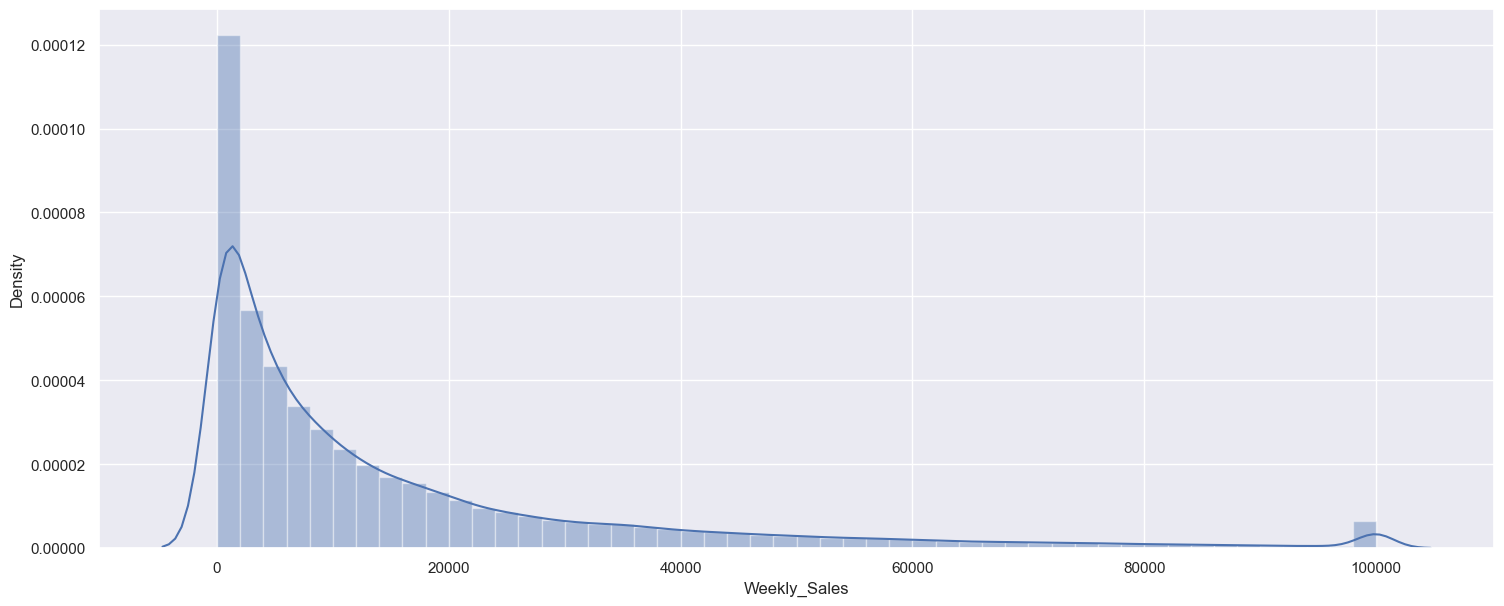

In [107]:
sns.distplot(y_train)

## Feature Extraction

<h2> Creating new features in training dataset

<h3> Temperature is in farehnheit, changing it to celcuis scale

In [112]:
X_train['Temperature'] = (X_train['Temperature'] - 32) * 5/9
X_test['Temperature'] = (X_test['Temperature'] - 32) * 5/9

In [114]:
X_train["Date"].dtype

dtype('O')

In [116]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])

In [118]:
# Convert to datetime
X_train["Date"] = pd.to_datetime(X_train["Date"])
X_test["Date"] = pd.to_datetime(X_test["Date"])

# Extract date features
X_train["Day"] = X_train['Date'].dt.day
X_train["Week"] = X_train['Date'].dt.isocalendar().week
X_train["Month"] = X_train['Date'].dt.month
X_train["Year"] = X_train['Date'].dt.year

X_test["Day"] = X_test['Date'].dt.day
X_test["Week"] = X_test['Date'].dt.isocalendar().week
X_test["Month"] = X_test['Date'].dt.month
X_test["Year"] = X_test['Date'].dt.year


In [120]:
#SUPERBOWL DATES
s_1=np.datetime64('2010-02-12')
s_2=np.datetime64('2011-02-11')
s_3=np.datetime64('2012-02-10')
s_4=np.datetime64('2013-02-08')

#labor day
l_1=np.datetime64('2010-09-10')
l_2=np.datetime64('2011-09-09')
l_3=np.datetime64('2012-09-07')
l_4=np.datetime64('2013-09-06')

#thanksgiving
t_1=np.datetime64('2010-11-26')
t_2=np.datetime64('2011-11-25')
t_3=np.datetime64('2012-11-23')
t_4=np.datetime64('2013-11-29')

#christams day
c_1=np.datetime64('2010-12-31')
c_2=np.datetime64('2011-12-30')
c_3=np.datetime64('2012-12-28')
c_4=np.datetime64('2013-12-27')

In [122]:
#Creating new variables on train data

X_train['Superbowl']=np.where(((X_train.Date==s_1) | (X_train.Date==s_2) |
                                  (X_train.Date==s_3) | (X_train.Date==s_4)),1,0)

X_train['labor']= np.where(((X_train.Date==l_1) | (X_train.Date==l_2) |
                                  (X_train.Date==l_3) | (X_train.Date==l_4)),1,0)

X_train['thanksgiving']=np.where(((X_train.Date==t_1) | (X_train.Date==t_2) |
                                  (X_train.Date==t_3) | (X_train.Date==t_4)),1,0)

X_train['christmas']=np.where(((X_train.Date==c_1) | (X_train.Date==c_2) |
                             (X_train.Date==c_3) | (X_train.Date==c_4)),1,0)

X_train.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
18120,2,74,2012-06-15,False,A,202307,26.977778,3.393,8573.41,195.00,...,221.400990,6.891,15,24,6,2012,0,0,0,0
248477,26,12,2010-02-26,False,A,152513,-2.600000,2.753,0.00,0.00,...,131.686000,8.488,26,8,2,2010,0,0,0,0
76886,8,81,2012-07-06,False,A,155078,27.355556,3.227,10526.01,157.93,...,225.440704,5.401,6,27,7,2012,0,0,0,0
80121,9,11,2010-10-01,False,B,125833,20.600000,2.603,0.00,0.00,...,215.214134,6.560,1,39,10,2010,0,0,0,0
159138,17,12,2012-01-13,False,B,93188,-6.511111,3.056,1552.86,3911.73,...,130.244000,6.403,13,2,1,2012,0,0,0,0


In [124]:
#Creating new variables on test data
X_test['Superbowl']=np.where(((X_test.Date==s_1) | (X_test.Date==s_2) |
                                  (X_test.Date==s_3) | (X_test.Date==s_4)),1,0)

X_test['labor']= np.where(((X_test.Date==l_1) | (X_test.Date==l_2) |
                                  (X_test.Date==l_3) | (X_test.Date==l_4)),1,0)

X_test['thanksgiving']=np.where(((X_test.Date==t_1) | (X_test.Date==t_2) |
                                  (X_test.Date==t_3) | (X_test.Date==t_4)),1,0)

X_test['christmas']=np.where(((X_test.Date==c_1) | (X_test.Date==c_2) |
                             (X_test.Date==c_3) | (X_test.Date==c_4)),1,0)

X_test.head()


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
367951,39,59,2012-07-27,False,A,184109,28.272222,3.407,1476.42,77.44,...,220.623405,6.623,27,30,7,2012,0,0,0,0
224280,23,71,2011-02-18,False,B,114533,-3.000000,3.263,0.00,0.00,...,133.370143,5.114,18,7,2,2011,0,0,0,0
162564,17,40,2010-02-26,False,B,93188,-9.088889,2.667,0.00,0.00,...,126.552286,6.548,26,8,2,2010,0,0,0,0
56720,6,79,2011-01-07,False,A,202505,8.766667,2.976,0.00,0.00,...,212.913427,6.858,7,1,1,2011,0,0,0,0
367745,39,58,2011-05-13,False,A,184109,25.216667,3.899,0.00,0.00,...,214.689978,8.300,13,19,5,2011,0,0,0,0


In [126]:
#converting IsHoliday variables from true/false to 1/0 on train data
X_train['IsHoliday']=np.where((X_train.IsHoliday==True),1,0)
X_train.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
18120,2,74,2012-06-15,0,A,202307,26.977778,3.393,8573.41,195.00,...,221.400990,6.891,15,24,6,2012,0,0,0,0
248477,26,12,2010-02-26,0,A,152513,-2.600000,2.753,0.00,0.00,...,131.686000,8.488,26,8,2,2010,0,0,0,0
76886,8,81,2012-07-06,0,A,155078,27.355556,3.227,10526.01,157.93,...,225.440704,5.401,6,27,7,2012,0,0,0,0
80121,9,11,2010-10-01,0,B,125833,20.600000,2.603,0.00,0.00,...,215.214134,6.560,1,39,10,2010,0,0,0,0
159138,17,12,2012-01-13,0,B,93188,-6.511111,3.056,1552.86,3911.73,...,130.244000,6.403,13,2,1,2012,0,0,0,0


In [128]:
#converting IsHoliday variables from true/false to 1/0 on test data
X_test['IsHoliday']=np.where((X_test.IsHoliday==True),1,0)
X_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
367951,39,59,2012-07-27,0,A,184109,28.272222,3.407,1476.42,77.44,...,220.623405,6.623,27,30,7,2012,0,0,0,0
224280,23,71,2011-02-18,0,B,114533,-3.000000,3.263,0.00,0.00,...,133.370143,5.114,18,7,2,2011,0,0,0,0
162564,17,40,2010-02-26,0,B,93188,-9.088889,2.667,0.00,0.00,...,126.552286,6.548,26,8,2,2010,0,0,0,0
56720,6,79,2011-01-07,0,A,202505,8.766667,2.976,0.00,0.00,...,212.913427,6.858,7,1,1,2011,0,0,0,0
367745,39,58,2011-05-13,0,A,184109,25.216667,3.899,0.00,0.00,...,214.689978,8.300,13,19,5,2011,0,0,0,0


<h3> Changing the values of Isholiday Columns according to special holidays

In [131]:
X_train['IsHoliday']=X_train['IsHoliday']|X_train['Superbowl']|X_train['labor']|X_train['thanksgiving']|X_train['christmas']
X_test['IsHoliday']=X_test['IsHoliday']|X_test['Superbowl']|X_test['labor']|X_test['thanksgiving']|X_test['christmas']

<h3> Dropping the extra columns as they now are redundant 

In [134]:
dplist=['Superbowl', 'labor', 'thanksgiving', 'christmas']
X_train.drop(dplist,inplace=True,axis=1)
X_test.drop(dplist,inplace=True,axis=1)

In [136]:
X_train=pd.get_dummies(X_train, drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

In [143]:
X_train

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year,Type_B,Type_C
18120,2,74,2012-06-15,0,202307,26.977778,3.393,8573.41,195.00,0.19,4455.38,5288.61,221.400990,6.891,15,24,6,2012,False,False
248477,26,12,2010-02-26,0,152513,-2.600000,2.753,0.00,0.00,0.00,0.00,0.00,131.686000,8.488,26,8,2,2010,False,False
76886,8,81,2012-07-06,0,155078,27.355556,3.227,10526.01,157.93,182.17,3068.98,4059.99,225.440704,5.401,6,27,7,2012,False,False
80121,9,11,2010-10-01,0,125833,20.600000,2.603,0.00,0.00,0.00,0.00,0.00,215.214134,6.560,1,39,10,2010,True,False
159138,17,12,2012-01-13,0,93188,-6.511111,3.056,1552.86,3911.73,0.52,542.24,1709.97,130.244000,6.403,13,2,1,2012,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,8,34,2010-10-29,0,155078,14.405556,2.716,0.00,0.00,0.00,0.00,0.00,215.273900,6.433,29,43,10,2010,False,False
371403,40,4,2010-06-18,0,155083,16.094444,2.805,0.00,0.00,0.00,0.00,0.00,132.473333,5.435,18,24,6,2010,False,False
312201,32,82,2011-02-04,0,203007,-9.183333,3.011,0.00,0.00,0.00,0.00,0.00,191.762589,8.818,4,5,2,2011,False,False
267336,28,3,2011-06-10,0,206302,25.955556,3.981,0.00,0.00,0.00,0.00,0.00,129.035710,13.736,10,23,6,2011,False,False


<Axes: >

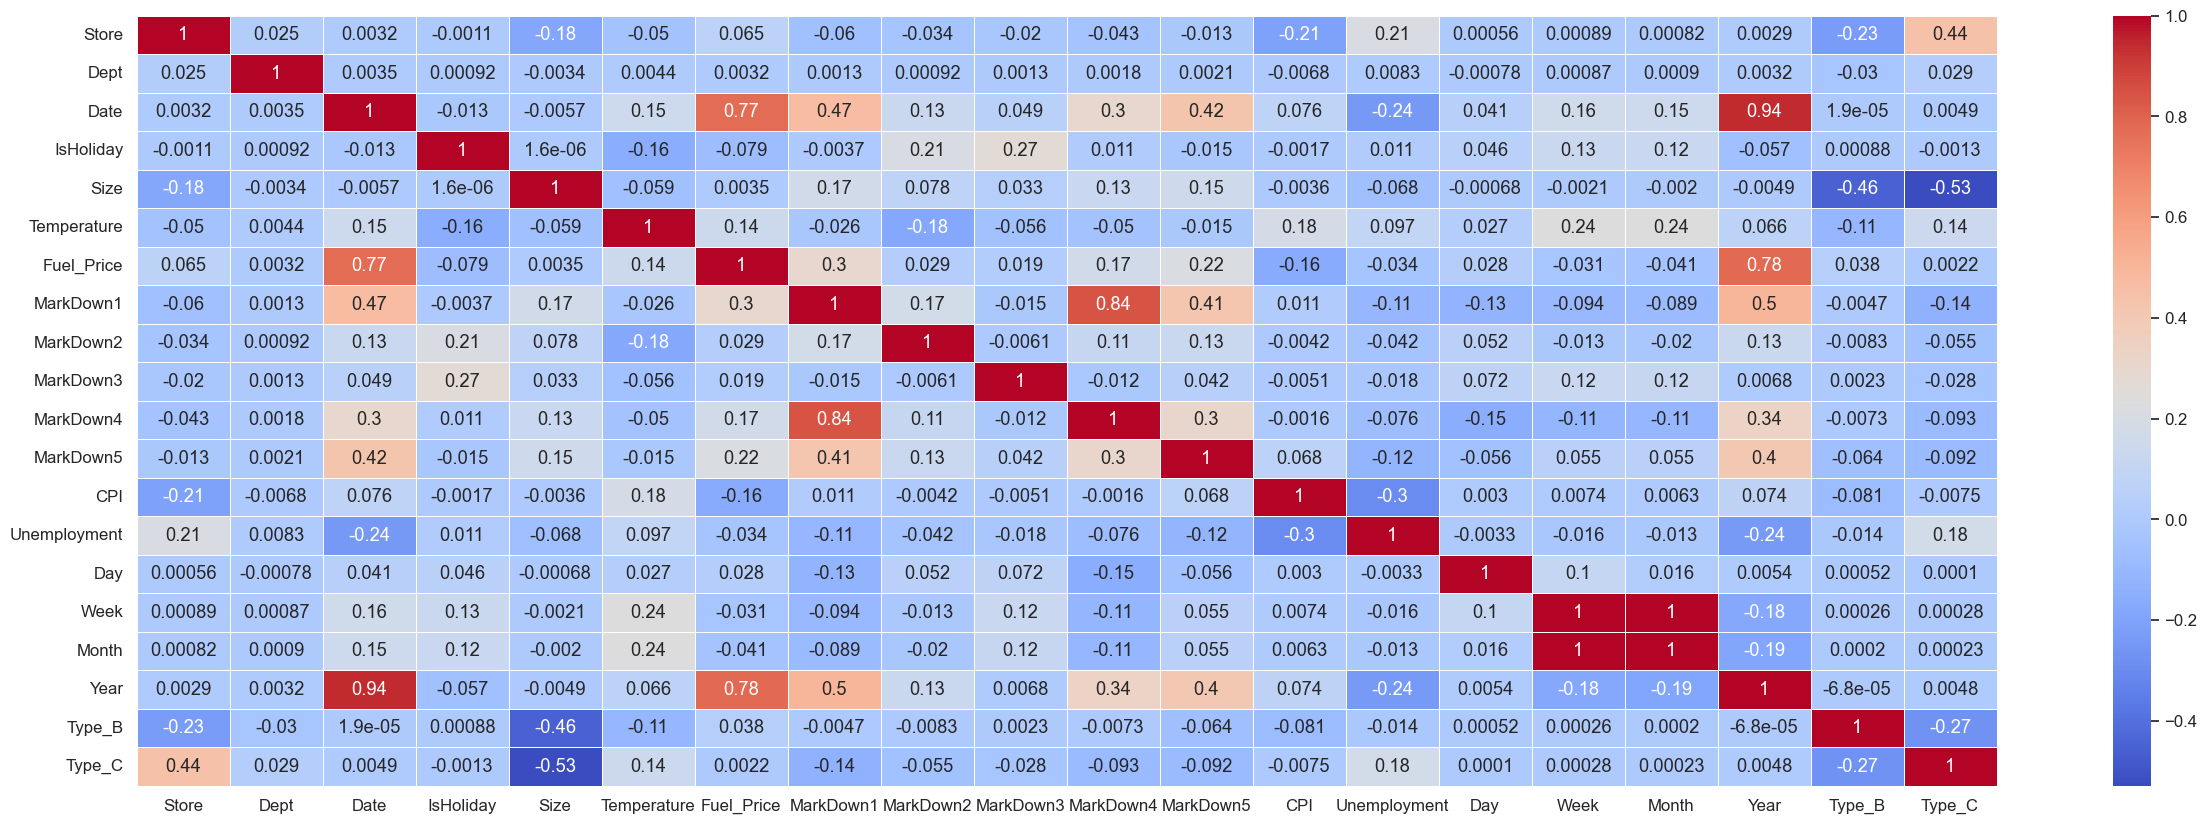

In [147]:
sns.set(rc={'figure.figsize':(30,10)}, font_scale=1.1)
sns.heatmap(X_train.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

<Axes: >

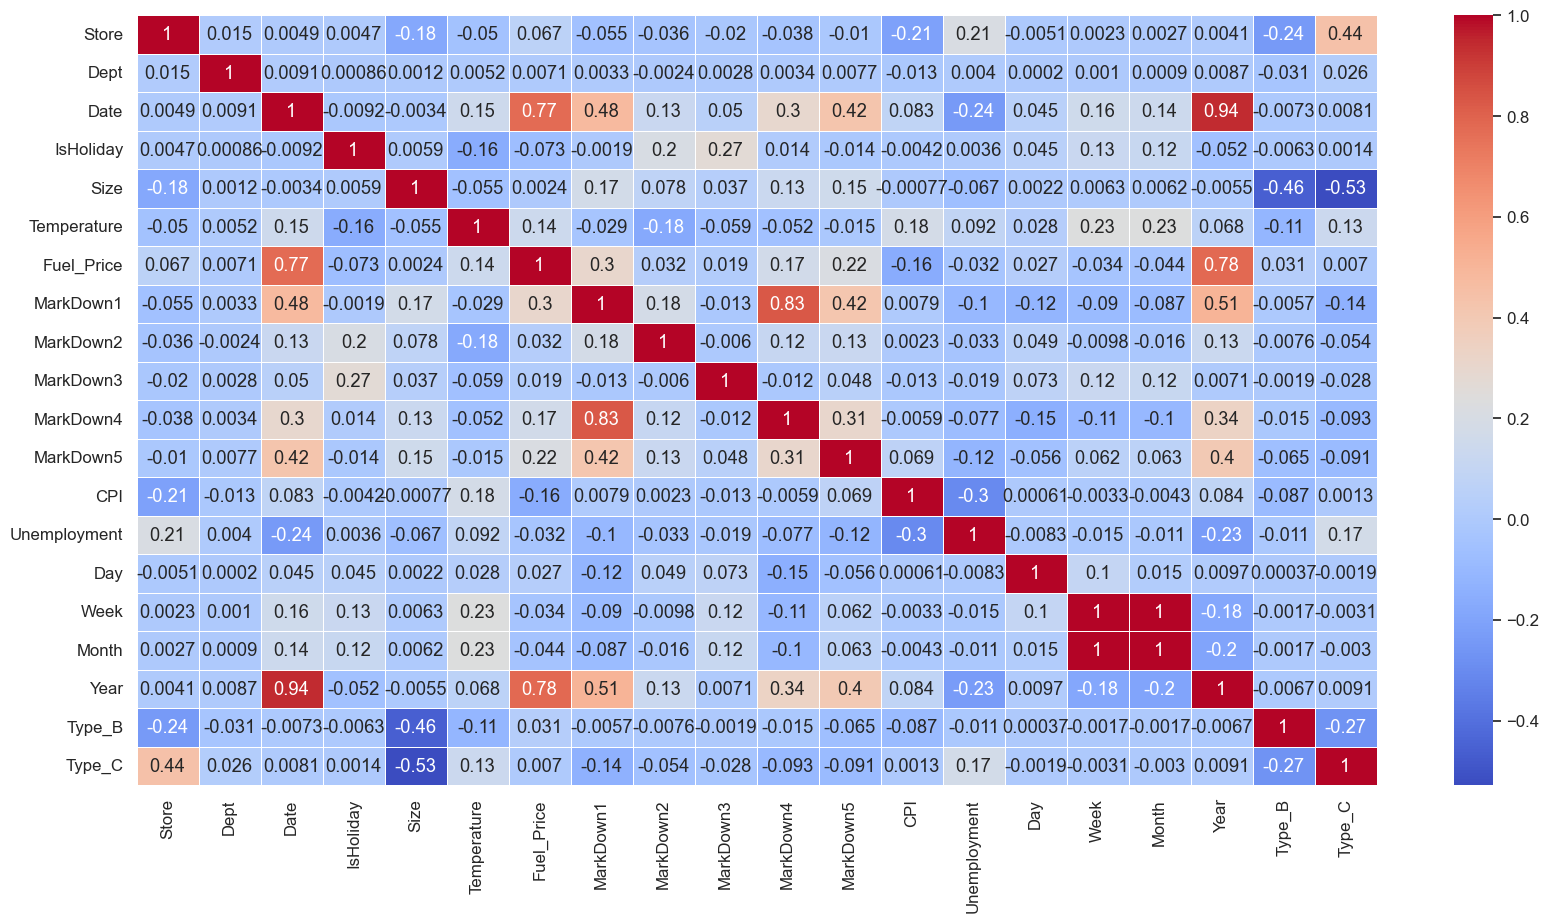

In [150]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(X_test.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

<big> <big> Observations:
    
- Markdown 4 is highly correlated to Markdown 1    
- Fuel Price is highly correlated to Year (It must be)
- Size and Type are negatively correlated
- Unemployment, CPI are correlated 
- Temperature is negatively correlated to unemployment
- Week Month Day Quarter are all messing up 
- Correlated features and skewed must be deleted

In [153]:
X_train.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month', 'Year',
       'Type_B', 'Type_C'],
      dtype='object')

In [156]:
X_train.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month', 'Year',
       'Type_B', 'Type_C'],
      dtype='object')

In [158]:
dpcol=['MarkDown1', 'MarkDown5', 'Year' , 'Day', 'Month' , 'CPI', 'Unemployment'] 
X_train.drop(dpcol,inplace=True,axis=1)
X_test.drop(dpcol,inplace=True,axis=1)

In [160]:
# Converting all float var int integer..
for var in X_train:
    if X_train[var].dtypes == float:
        X_train[var]=X_train[var].astype(int)
        
for var in X_test:
    if X_test[var].dtypes == float:
        X_test[var]=X_test[var].astype(int)

In [162]:
X_train

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,Week,Type_B,Type_C
18120,2,74,2012-06-15,0,202307,26,3,195,0,4455,24,False,False
248477,26,12,2010-02-26,0,152513,-2,2,0,0,0,8,False,False
76886,8,81,2012-07-06,0,155078,27,3,157,182,3068,27,False,False
80121,9,11,2010-10-01,0,125833,20,2,0,0,0,39,True,False
159138,17,12,2012-01-13,0,93188,-6,3,3911,0,542,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,8,34,2010-10-29,0,155078,14,2,0,0,0,43,False,False
371403,40,4,2010-06-18,0,155083,16,2,0,0,0,24,False,False
312201,32,82,2011-02-04,0,203007,-9,3,0,0,0,5,False,False
267336,28,3,2011-06-10,0,206302,25,3,0,0,0,23,False,False


<h2> Train and Test Definition</h2>
* Defining training and testing dataset

In [165]:
#   train X= Exery thing except Weekly_Sales and Date offcourse
train_X=X_train.drop(['Date'], axis=1)

#  train Y= Only Weekly_Sales 
test_X=X_test.drop('Date',axis=1).copy()

train_X.shape, y_train.shape, test_X.shape, y_test.shape

((379413, 12), (379413,), (42157, 12), (42157,))

## Building Models

### Linear Regression

In [169]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

In [171]:
# Define model
model = ElasticNet()

# Parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# Use R² score as scoring
scorer = make_scorer(r2_score)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
grid_search.fit(train_X, y_train)

# Best hyperparameters and score
print("Best params:", grid_search.best_params_)
print("Best CV R² score:", grid_search.best_score_)

# Predict on test data using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_X)

# Evaluate
print("Test R² score:", r2_score(y_test, y_pred))


Best params: {'alpha': 0.001, 'l1_ratio': 0.9}
Best CV R² score: 0.09032888431226682
Test R² score: 0.09111124595401687


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Accuracy of Linear Regression model: 9.05%


### Random Forest

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [432]:

# Define the model
rf = RandomForestRegressor(random_state=2)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Define scoring
scorer = make_scorer(r2_score)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring=scorer, n_jobs=-1, verbose=1)
grid_search.fit(train_X, y_train)

# Results
print("Best Params:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Predict and evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(test_X)

print("Test R² Score:", r2_score(y_test, y_pred))


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
%timeit
param_grid={'n_estimators':np.arange(21,101)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1, verbose=50)
tree.fit(train_X,y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


In [62]:
tree.best_params_

{'n_estimators': 37}

In [65]:
clf_rf = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
clf_rf.fit(train_X,train_y)
y_pred_rf = clf_rf.predict(test_X)
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 37building tree 2 of 37building tree 3 of 37building tree 4 of 37



building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.2s


building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   54.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.8s


Accuracy of Random Forest model: 99.75%


[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    2.7s finished


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
reg = DecisionTreeRegressor()
reg.fit(train_X,train_y)
y_pred_dt = reg.predict(test_X)
acc_dt = round(reg.score(train_X,train_y)*100,2)
print("Accuracy of Decision Tree Model: "+str(acc_dt)+'%')

Accuracy of Decision Tree Model: 100.0%


### Comparing Models
Let's compare the accuracy of all models used above.

In [71]:
models = pd.DataFrame({'Model':['Linear Regression','Random Forest','Decision Tree'],
                      'Score':[acc_lm,acc_rf,acc_dt]})
models.sort_values(by='Score',ascending= False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.75
0,Linear Regression,9.05


<h1> Predicting Weekly Sales value for test data based on DT and RF

In [72]:
#Predicting values
submission = pd.DataFrame({
    'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
    'Weekly_Sales_dt': y_pred_dt , 'Weekly_sales_rf' : y_pred_rf})
submission.to_csv('weekly_sales Predicted.csv',index=False)
# submission.to_excel(writer,'Weekly_sales Pred',index = False)-- Not working

In [73]:
submission.head()

,Store_Dept_Date,Weekly_Sales_dt,Weekly_sales_rf
0,1_1_2012-11-02,39886.0,32522.189189
1,1_2_2012-11-02,47313.0,47186.378378
2,1_3_2012-11-02,9959.0,10464.270270
3,1_4_2012-11-02,37656.0,38839.594595
4,1_5_2012-11-02,31002.0,29941.891892


In [74]:
writer.save()

<h1><big> ------------Finish------------